In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the file from the main directory

In [2]:
df=pd.read_csv("Diwali Sales Data.csv",encoding='ISO-8859-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Here  we perform some data Wrangling tasks..

In [3]:
#for analysis we dont need user id and cust name so we drop that col to make our data easier
drop=['User_ID','Cust_name','Product_ID','Status','unnamed1']
df.drop(drop,axis=1,inplace=True)

In [4]:
df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [5]:
df.isnull().sum()

Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [6]:
df.dtypes

Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [7]:
#here we have some null vales in our dataset so we replace them with its mean values
df['Amount'].fillna(df['Amount'].mean(),inplace=True)

In [8]:
df.isnull().sum()

Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [9]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [10]:
df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [11]:
df['Age'].isnull().sum()

0

In [12]:
#change the data type to int
# df['Amount']=pd.to_numeric(df['Amount'],downcast='integer') it is also used 

df['Amount']=df['Amount'].astype(int)

In [13]:
df['Amount'].dtype

dtype('int32')

In [14]:
#to get all information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            11251 non-null  object
 1   Age Group         11251 non-null  object
 2   Age               11251 non-null  int64 
 3   Marital_Status    11251 non-null  int64 
 4   State             11251 non-null  object
 5   Zone              11251 non-null  object
 6   Occupation        11251 non-null  object
 7   Product_Category  11251 non-null  object
 8   Orders            11251 non-null  int64 
 9   Amount            11251 non-null  int32 
dtypes: int32(1), int64(3), object(6)
memory usage: 835.2+ KB


In [15]:
#to get all the descrip of whole dataset like mean max min ....etc
df.describe()

,Age,Marital_Status,Orders,Amount
count,11251.000000,11251.000000,11251.000000,11251.000000
mean,35.421207,0.420318,2.489290,9453.609901
std,12.754122,0.493632,1.115047,5219.569169
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,1.500000,5443.500000
50%,33.000000,0.000000,2.000000,8110.000000
75%,43.000000,1.000000,3.000000,12671.000000
max,92.000000,1.000000,4.000000,23952.000000


# LET'S BEGIN WITH EDA 

## Most sales counts By gender 

<Axes: xlabel='Gender', ylabel='count'>

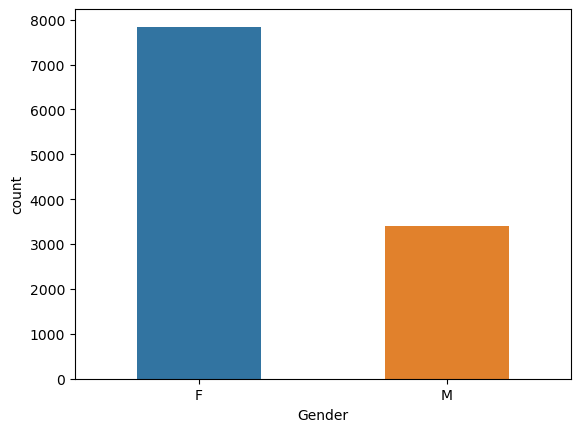

In [16]:
sns.countplot(x='Gender',data=df,width=0.5)

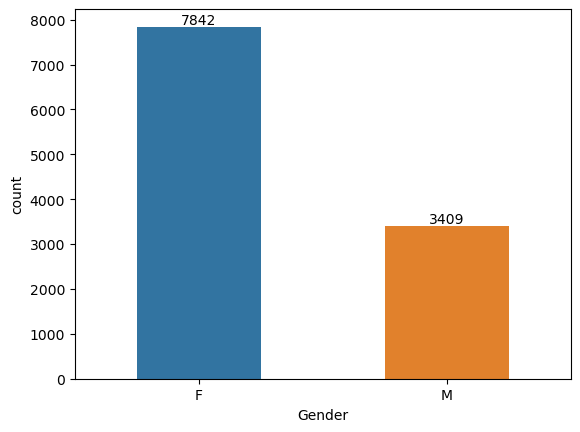

In [17]:
ax=sns.countplot(x='Gender',data=df,width=0.5)
for bars in ax.containers:
    ax.bar_label(bars)

## Top States by zone 

In [72]:
import plotly.express as px
labels=df['Zone'].unique()
values=df['State'].value_counts()
fig=px.pie(values,labels=labels,title="Sale by Zone/State",names=values.index,hole=0.3)
fig.show()

In [19]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

In [20]:
df['State'].value_counts()

Uttar Pradesh       1946
Maharashtra         1526
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              429
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64

## Sale by Married status and gender category and use Age as hue

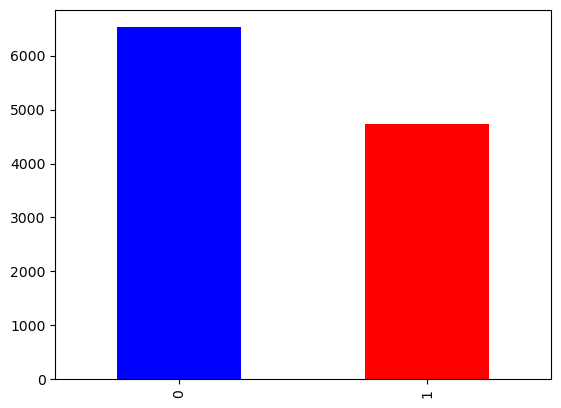

In [21]:
c=['b','r']
p=df['Marital_Status'].value_counts().plot(kind='bar',color=c)

In [22]:
#pucherse amount by genders
sale_by_gen = df.groupby('Gender')['Amount'].sum().sort_values(ascending=False)
#this data is in series form so we have to reset its index 

In [23]:
sale_by_gen

Gender
F    74430383
M    31932182
Name: Amount, dtype: int32

In [24]:
sale_df=sale_by_gen.reset_index()

Text(0.5, 1.0, 'Sales Amount By gender category')

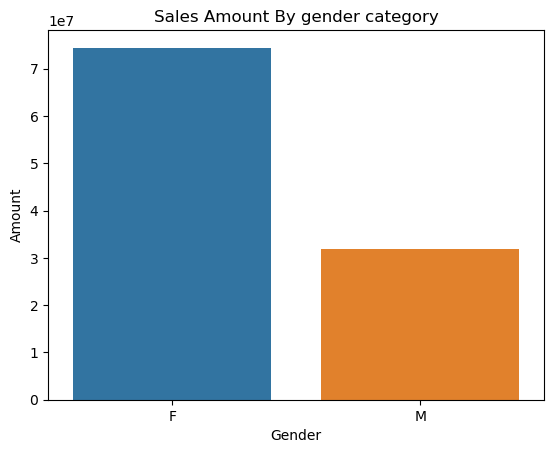

In [25]:
sns.barplot(x='Gender',y='Amount',data=sale_df)
plt.title("Sales Amount By gender category")

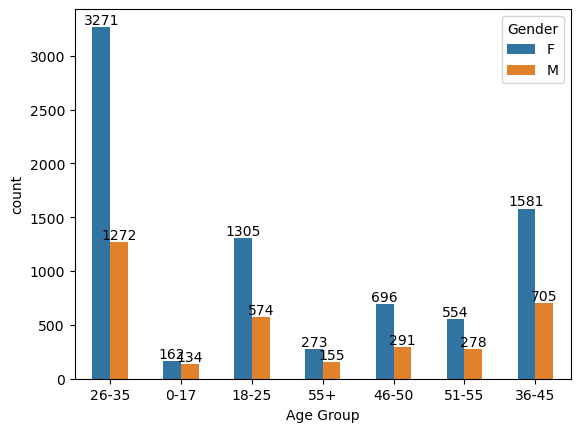

In [26]:
ax=sns.countplot(x='Age Group',data=df,width=0.5,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

# Female age bw 26-35 And male age bw 36-45 spend more amount in products

In [73]:
# ax = sns.countplot(x='Age Group', data=df, width=0.5, hue='Gender').bar_label(ax.containers[0])


## Sale Amount by Age group and applied on gender category

In [28]:
sale_by_agegroup = df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False)
sale_by_agegroup
#again this data is series form so we have to convert it into df form

Age Group
26-35    42632348
36-45    22173353
18-25    17240732
46-50     9245656
51-55     8280383
55+       4090440
0-17      2699653
Name: Amount, dtype: int32

In [29]:
#convert series to df form
df_sale_by_agegroup=sale_by_agegroup.reset_index()

Text(0.5, 1.0, 'Sale Amount by age group')

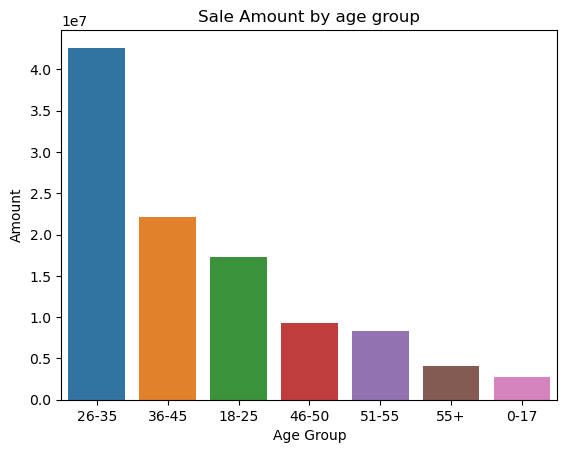

In [30]:
sns.barplot(x='Age Group',y='Amount',data=df_sale_by_agegroup)
plt.title("Sale Product Amount by age group")

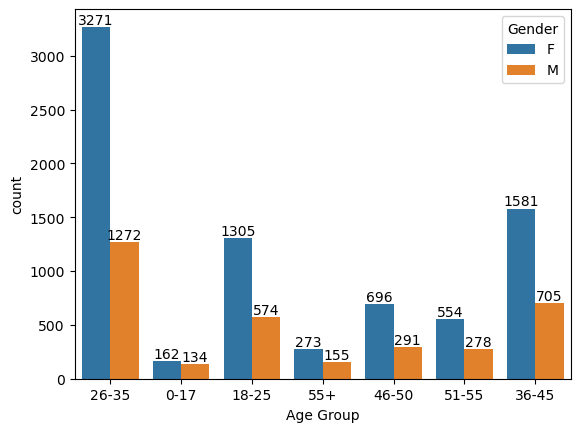

In [31]:
#here we can m And f in each age group
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

# Here we can see people age bw 26-35 spend large amount in products

## Orders By top 10 State 

In [74]:
orderby_state=df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)
orderby_state

State
Uttar Pradesh       4813
Maharashtra         3811
Karnataka           3241
Delhi               2744
Madhya Pradesh      2259
Andhra Pradesh      2054
Himachal Pradesh    1568
Kerala              1137
Haryana             1109
Gujarat             1070
Name: Orders, dtype: int64

In [75]:
df_saleby_state=orderby_state.reset_index()

Text(0.5, 1.0, 'Orders  by State')

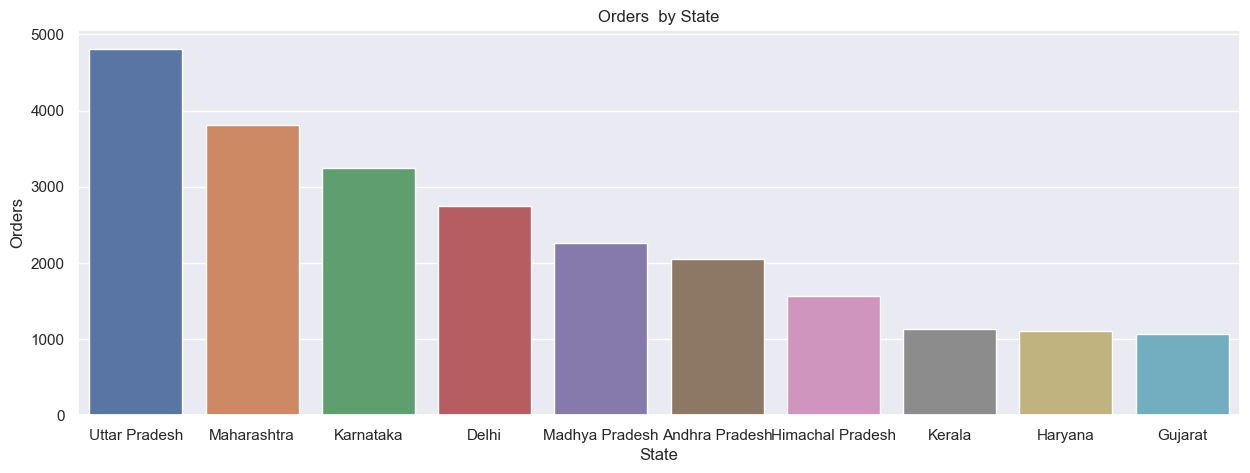

In [77]:
sns.barplot(x='State',y="Orders",data=df_saleby_state)
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Orders  by State")

# UP has most orders above all states

# here we see highest amount By top 10 state

In [35]:
amountby_state=df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
amountby_state

State
Uttar Pradesh       19393874
Maharashtra         14436996
Karnataka           13532993
Delhi               11632177
Madhya Pradesh       8120048
Andhra Pradesh       8046599
Himachal Pradesh     4963368
Haryana              4220175
Bihar                4022757
Gujarat              3964988
Name: Amount, dtype: int32

In [36]:
df_amountby_state=amountby_state.reset_index()

Text(0.5, 1.0, 'Amount By State')

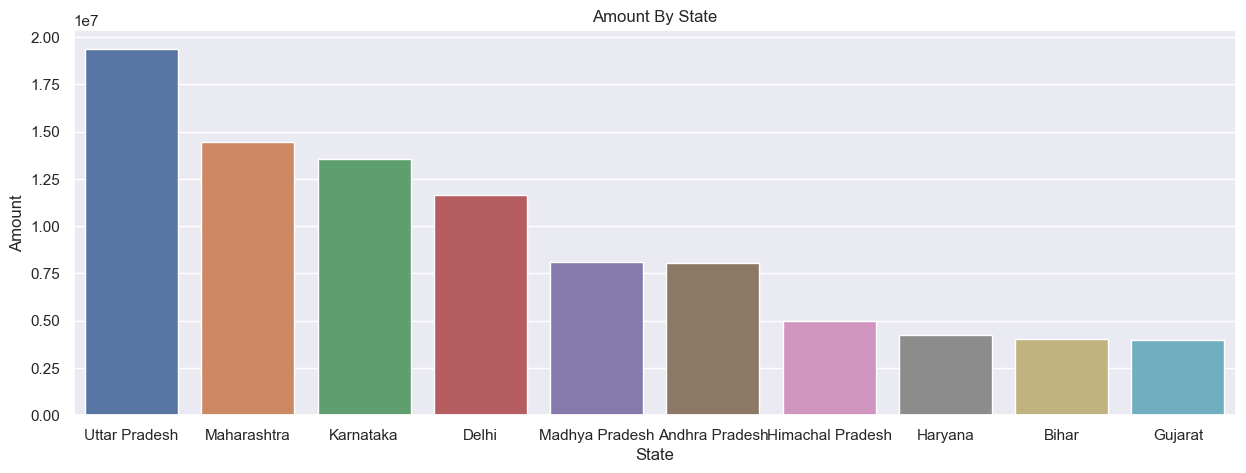

In [37]:
sns.barplot(x='State',y='Amount',data=df_amountby_state)
sns.set(rc={'figure.figsize':(15,5)})
plt.title("Amount By State")


#  Above we can see, UP people  spend a large amount in products

In [38]:
df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


## Here we see  Sale counts by Married status And see How many are Male and Females

Text(0.5, 1.0, 'Sales By married Status')

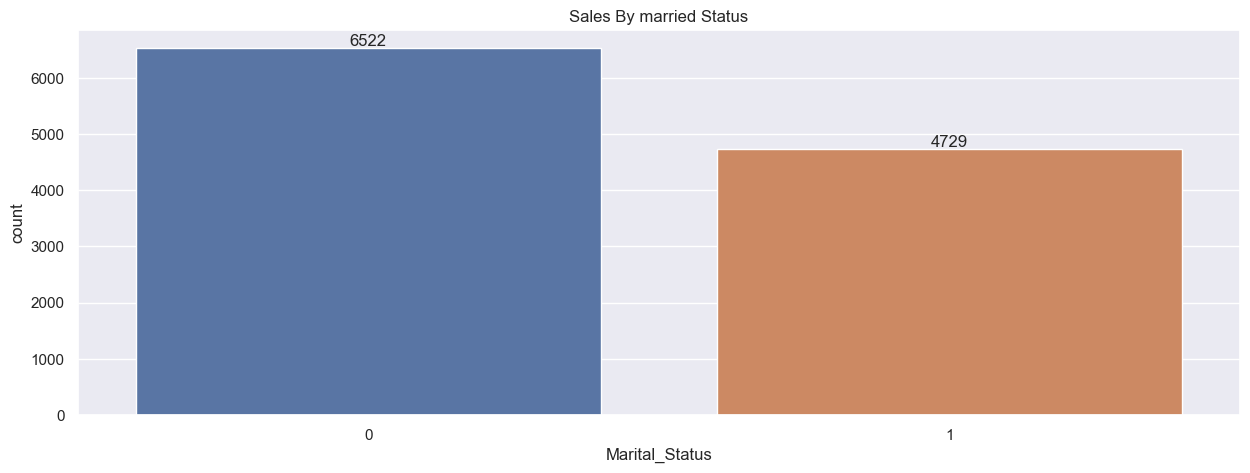

In [80]:
ax=sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Sales By married Status")        


In [81]:
#married / gender status
sales_status=df.groupby(['Marital_Status','Gender'])['Amount'].sum().sort_values(ascending=False)
sales_status

Marital_Status  Gender
0               F         43815005
1               F         30615378
0               M         18348191
1               M         13583991
Name: Amount, dtype: int32

In [82]:
df_sales_status=sales_status.reset_index()

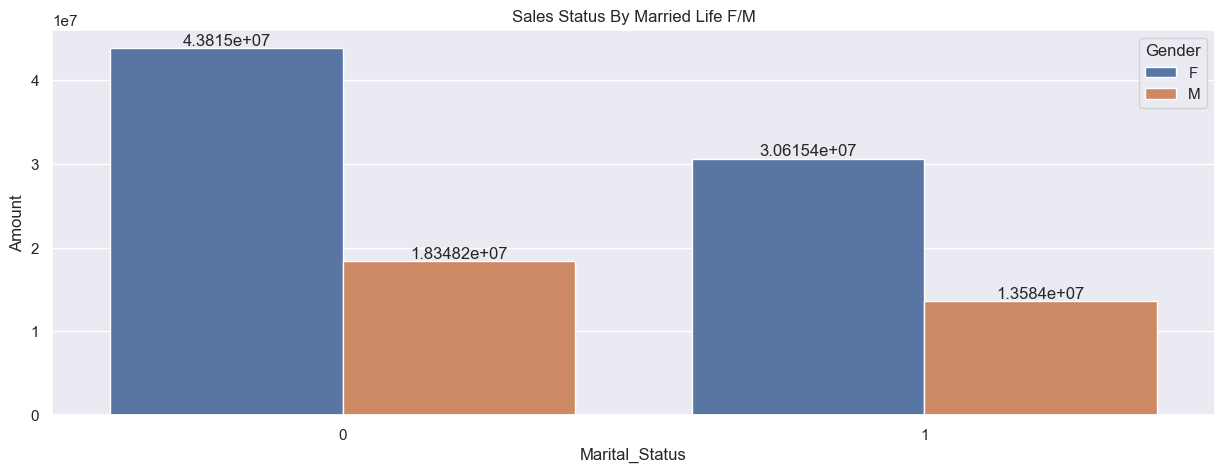

In [83]:
ax=sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=df_sales_status)
sns.set(rc={'figure.figsize':(7,5)})
plt.title("Sales Status By Married Life F/M")
for bars in ax.containers:
    ax.bar_label(bars)
    

# female with 0 married status spend large amount in products
## these amount values are in 10^7 like form

# Here we see sales count by Occupation and check most spended amount by Occupation

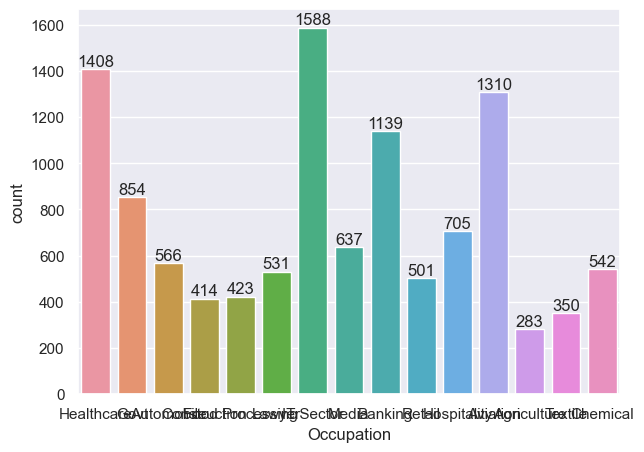

In [44]:
ax=sns.countplot(x='Occupation',data=df)
sns.set(rc={'figure.figsize':(15,15)})
for bars in  ax.containers:
    ax.bar_label(bars)

In [87]:
#sales by Occupation
sales_occ=df.groupby(['Occupation'])['Amount'].sum().sort_values(ascending=False).head(10)
sales_occ

Occupation
IT Sector      14802344
Healthcare     13034586
Aviation       12602298
Banking        10789516
Govt            8517212
Hospitality     6395311
Media           6295832
Automobile      5378049
Chemical        5306889
Lawyer          4981665
Name: Amount, dtype: int32

In [88]:
df_salesocc=sales_occ.reset_index()

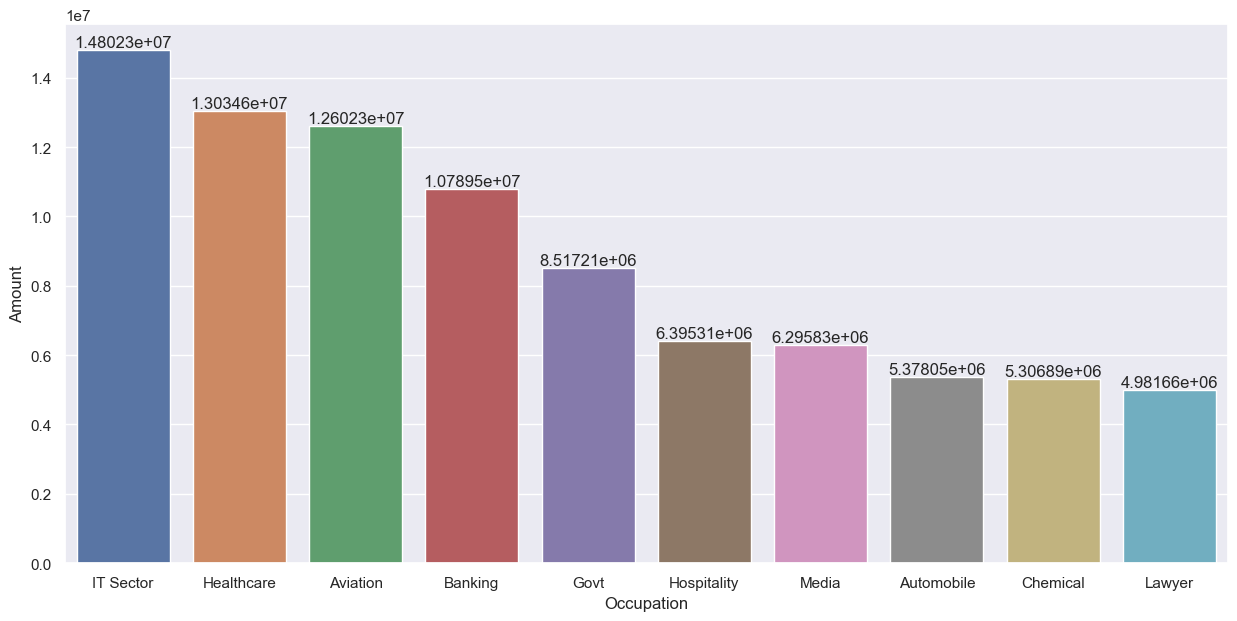

In [89]:
ax=sns.barplot(x='Occupation',y='Amount',data=df_salesocc)
sns.set(rc={'figure.figsize':(15,7)})
for bars in  ax.containers:
    ax.bar_label(bars)

# As we can see above IT Sector and Healthcare spend more amount in products

# here we check sales count by product category and their spended amount

Text(0.5, 1.0, 'Sale Count of Product_Category ')

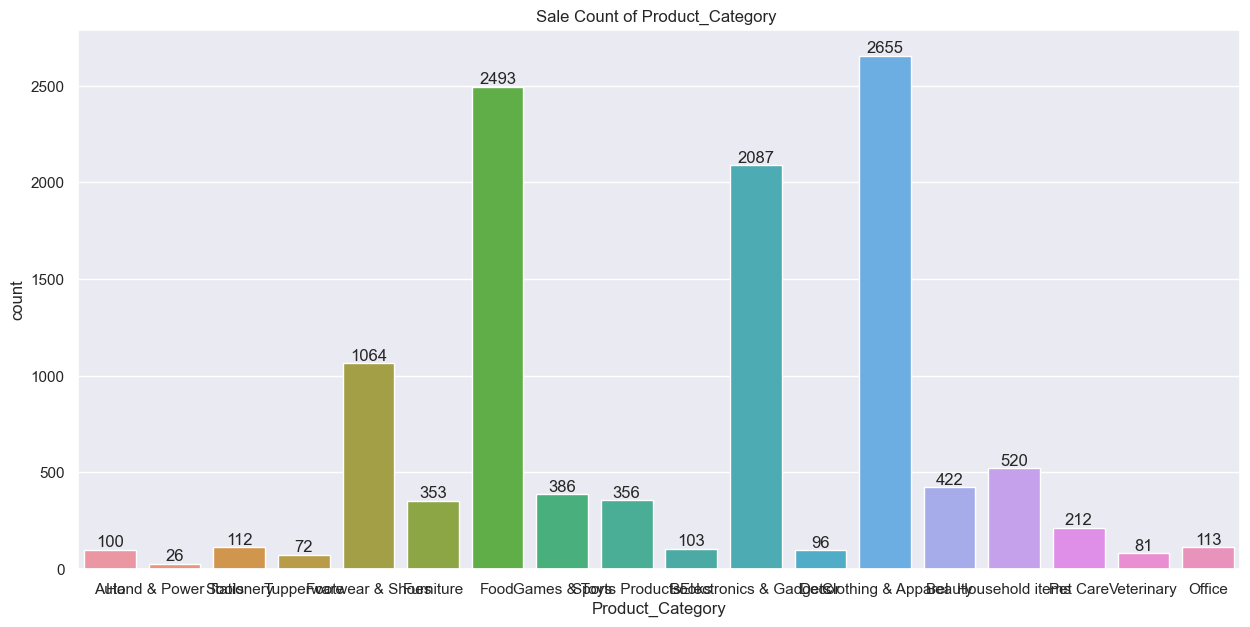

In [90]:
ax=sns.countplot(x='Product_Category',data=df)
sns.set(rc={'figure.figsize':(15,15)})
for bars in  ax.containers:
    ax.bar_label(bars)
plt.title("Sale Count of Product_Category ")    

In [91]:
#amount/Product_Category
sale_byproduct=df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10)
df_sale_byproduct=sale_byproduct.reset_index()

In [92]:
df_sale_byproduct

,Product_Category,Amount
0,Food,33962242
1,Clothing & Apparel,16495019
2,Electronics & Gadgets,15643846
3,Footwear & Shoes,15622474
4,Furniture,5449504
5,Games & Toys,4331694
6,Sports Products,3635933
7,Auto,1986968
8,Beauty,1959484
9,Stationery,1676051


Text(0.5, 1.0, 'Sales By Product_Category')

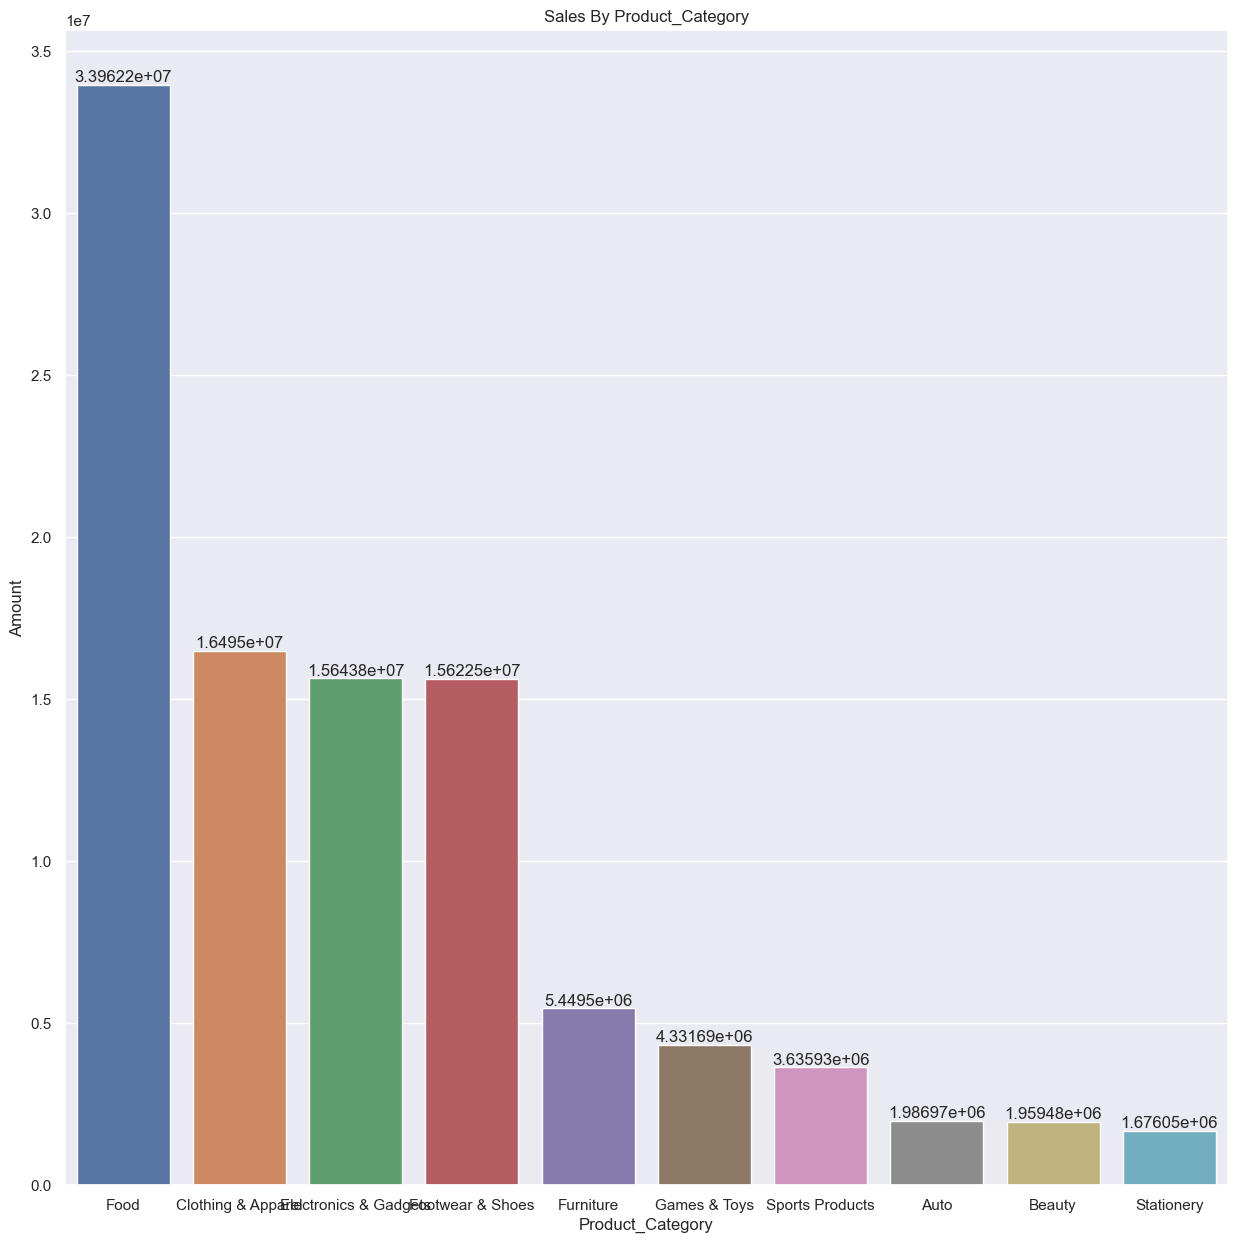

In [93]:
ax=sns.barplot(x='Product_Category',y='Amount',data=df_sale_byproduct)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Sales By Product_Category")

## as we can check food category spend a large amount to buy products 